In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine
from GTGP import GTGP


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [24]:
X_train = pd.read_csv("../data/madelon_train.data",delimiter=" ",header=None).iloc[:,:-1].values
y_train = pd.read_csv("../data/madelon_train.labels",delimiter=" ",header=None).values.flatten()
y_train[y_train==-1] = 0

X_test = pd.read_csv("../data/madelon_valid.data",delimiter=" ",header=None).iloc[:,:-1].values
y_test = pd.read_csv("../data/madelon_valid.labels",delimiter=" ",header=None).values.flatten()
y_test[y_test==-1] = 0

seeds = [10086, 200,500,30506,30405,30420,10056,7059,40965,5398,869543,83491,823190,
         48392,2810,48392,3498210,483902,859032,12890,538920,86954,54309,6504,9840,
         219805,548,2981,432890,5438908,219094,5843902,60854,979,12890,2108,4093]
X = np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])
# X = X[:,[28,48,64,105,128,153,241,281,318,336,338,378,433,442,451,453,455,472,475,493]]


train_size = 2000

dataset = 'madelon'

In [25]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

# model

In [33]:
def fit_trees(tolerance = 0.001,max_nodes=1000):
    learning_rate=1
    max_depth=3
    bins=5
    lam=10

    gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

    total_size=10000
    elite_size = 30
    epoch= 10
    gp_epoch= 3
    verbose = 1

    # gtgp.fit_fixed_number(X_train,y_train,total_size=total_size,elite_size = elite_size,
    #                       epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,max_nodes=max_nodes,verbose=verbose)
    gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

    # retrain_epoch= max(3000//sum([tree.numNode for tree in gtgp.stack]),1)
    retrain_epoch = 10

    alpha=0
    beta=1
    gammer=0

    verbose=1
    gtgp.lam = 10
    gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

    return gtgp


test_sses = []
test_accs = []

# tors = [0,1e-12,1e-4,1e-2]
tors = [1e-4]
for t in tors:
    test_sse = []
    test_acc = []
    for i in range(1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
        y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

        gtgp = fit_trees(tolerance=t,max_nodes=1000)
        num_trees,depth,num_nodes = gtgp.print_model()
        test_sse.append(gtgp.test_sse)
        test_acc.append(gtgp.test_acc)
    min_epoch = min([len(t) for t in test_acc])
    test_sses.append(test_sse)
    test_accs.append(test_acc)

87 469 1
166 870 2
247 1279 3
332 1714 4
398 2056 5
474 2450 6
557 2815 7
635 3239 8
714 3674 9
780 4028 10
retrain  1  tree 0 :
	train: 0.67 0.6697027324592133 	test: 0.635 0.6340230448502808
retrain  1  tree 1 :
	train: 0.6675 0.6672103898417598 	test: 0.6366666666666667 0.635630237118916
retrain  1  tree 2 :
	train: 0.669 0.6687585249646992 	test: 0.6383333333333333 0.6372359721490843
retrain  1  tree 3 :
	train: 0.669 0.6687585249646992 	test: 0.6366666666666667 0.635630237118916
retrain  1  tree 4 :
	train: 0.6755 0.6754901835780532 	test: 0.6416666666666667 0.6412271699498553
retrain  1  tree 5 :
	train: 0.6815 0.6814865428064336 	test: 0.6433333333333333 0.6430120441730891
retrain  1  tree 6 :
	train: 0.683 0.6829971469743228 	test: 0.64 0.639803893230759
retrain  1  tree 7 :
	train: 0.683 0.6829844662388457 	test: 0.6416666666666667 0.6414425682718367
retrain  1  tree 8 :
	train: 0.6805 0.6804999201249801 	test: 0.6366666666666667 0.6364687440940067
retrain  1  tree 9 :
	train:

In [ ]:
[len(t) for t in test_sses]

[1]

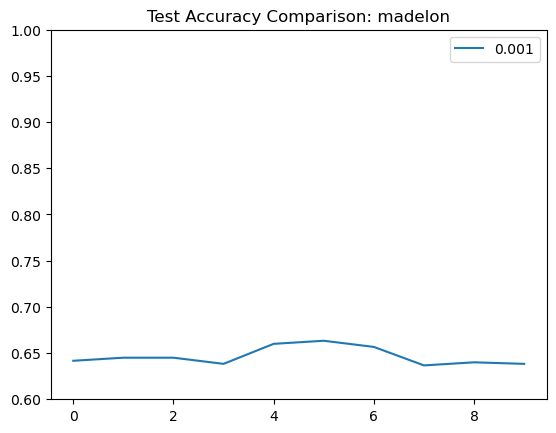

In [ ]:
length = 10
test_acc_avgs = []
for t in test_accs:
    avg = []
    # length = min([len(i) for i in t])
    for i in range(length):
        avg.append(np.average([x[i] for x in t]))
    test_acc_avgs.append(avg)

for i in range(len(test_acc_avgs)):
    plt.plot(test_acc_avgs[i])
    # plt.plot(test_sses[i][:min_epoch])

# plt.yscale('log')
plt.title("Test Accuracy Comparison: "+dataset)
plt.ylim(0.6,1)
plt.legend(tors[:len(test_sses)])
plt.show()


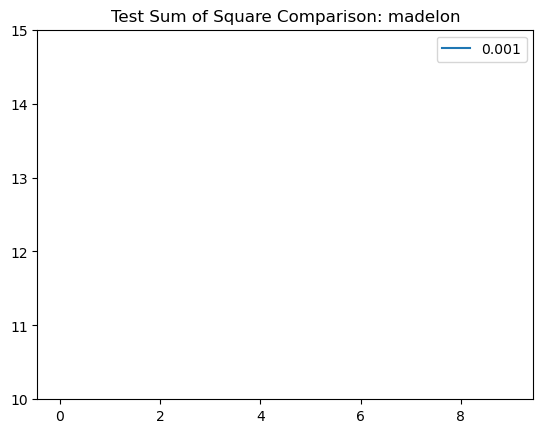

In [ ]:
length = 10
test_sse_avg = []
for t in test_sses:
    avg = []
    for i in range(length):
        avg.append(np.average([x[i] for x in t]))
    test_sse_avg.append(avg)

for i in range(len(test_sse_avg)):
    plt.plot(test_sse_avg[i])
    # plt.plot(test_sses[i][:min_epoch])

# plt.yscale('log')

plt.title("Test SSE: "+dataset)
plt.ylim(10,15)
plt.title("Test Sum of Square Comparison: "+dataset)
plt.legend(tors[:len(test_sses)])
plt.show()
